<a href="https://colab.research.google.com/github/khanhne28/BT_AI/blob/main/Tuan2/BTVN/RainFall_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=fd2e070a4284195a06af39c45e7d6129309a2ce266cf45074a4586bad8239656
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


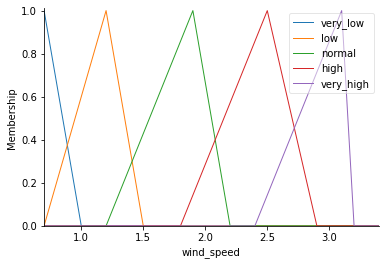

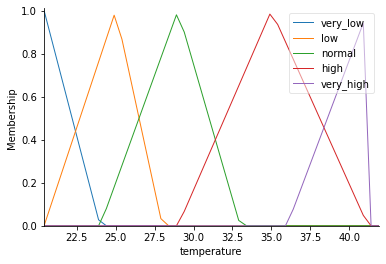

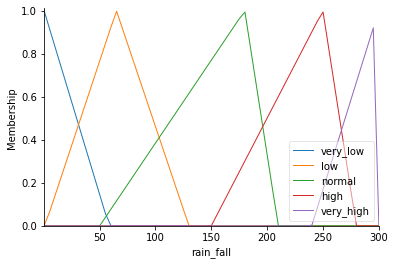

In [15]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

ws =ctrl.Antecedent(np.arange(0.7,3.5,0.1),'wind_speed') 
tp =ctrl.Antecedent(np.arange(20.4,42,0.5),'temperature')    
rf = ctrl.Consequent(np.arange(0.2,305,5),'rain_fall')

ws['very_low'] = fuzz.trimf(ws.universe,[0.7,0.7,1])
ws['low'] = fuzz.trimf(ws.universe,[0.7,1.2,1.5])
ws['normal'] = fuzz.trimf(ws.universe,[1.2,1.9,2.2])
ws['high'] = fuzz.trimf(ws.universe,[1.8,2.5,2.9])
ws['very_high'] = fuzz.trimf(ws.universe,[2.4,3.1,3.1])

tp['very_low'] = fuzz.trimf(tp.universe,[20.4,20.4,24])
tp['low'] = fuzz.trimf(tp.universe,[20.4,25,28])
tp['normal'] = fuzz.trimf(tp.universe,[24,29,33])
tp['high'] = fuzz.trimf(tp.universe,[29,35,41.2])
tp['very_high'] = fuzz.trimf(tp.universe,[36,41.2,41.2])

rf['very_low'] = fuzz.trimf(rf.universe,[0.2,0.2,58.5])
rf['low'] = fuzz.trimf(rf.universe,[1,65,130])
rf['normal'] = fuzz.trimf(rf.universe,[50,180,210])
rf['high'] = fuzz.trimf(rf.universe,[150,250,280])
rf['very_high'] = fuzz.trimf(rf.universe,[240,300,300])

ws.view()
tp.view()
rf.view()

In [16]:
rule1 = ctrl.Rule(tp['very_low']&ws['very_low'],rf['very_low'])
rule2 = ctrl.Rule(tp['very_low']&ws['low'],rf['very_low'])
rule3 = ctrl.Rule(tp['very_low']&ws['normal'],rf['low'])
rule4 = ctrl.Rule(tp['very_low']&ws['high'],rf['low'])
rule5 = ctrl.Rule(tp['very_low']&ws['very_high'],rf['normal'])

rule6 = ctrl.Rule(tp['low']&ws['very_low'],rf['very_low'])
rule7 = ctrl.Rule(tp['low']&ws['low'],rf['low'])
rule8 = ctrl.Rule(tp['low']&ws['normal'],rf['low'])
rule9 = ctrl.Rule(tp['low']&ws['high'],rf['normal'])
rule10 = ctrl.Rule(tp['low']&ws['very_high'],rf['normal'])

rule11 = ctrl.Rule(tp['normal']&ws['very_low'],rf['low'])
rule12 = ctrl.Rule(tp['normal']&ws['low'],rf['low'])
rule13 = ctrl.Rule(tp['normal']&ws['normal'],rf['normal'])
rule14 = ctrl.Rule(tp['normal']&ws['high'],rf['normal'])
rule15 = ctrl.Rule(tp['normal']&ws['very_high'],rf['high'])

rule16 = ctrl.Rule(tp['high']&ws['very_low'],rf['normal'])
rule17 = ctrl.Rule(tp['high']&ws['low'],rf['normal'])
rule18 = ctrl.Rule(tp['high']&ws['normal'],rf['normal'])
rule19 = ctrl.Rule(tp['high']&ws['high'],rf['high'])
rule20 = ctrl.Rule(tp['high']&ws['very_high'],rf['very_high'])

rule21 = ctrl.Rule(tp['very_high']&ws['very_low'],rf['normal'])
rule22 = ctrl.Rule(tp['very_high']&ws['low'],rf['normal'])
rule23 = ctrl.Rule(tp['very_high']&ws['normal'],rf['high'])
rule24 = ctrl.Rule(tp['very_high']&ws['high'],rf['very_high'])
rule25 = ctrl.Rule(tp['very_high']&ws['very_high'],rf['very_high'])

139.75440911551382


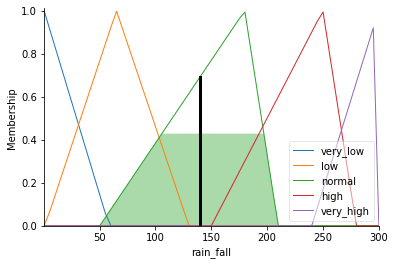

In [19]:
rainfall_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,
                                   rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,
                                   rule23,rule24,rule25])
rainfall = ctrl.ControlSystemSimulation(rainfall_ctrl)
rainfall.input['wind_speed'] = 1.5
rainfall.input['temperature'] = 35
rainfall.compute() #tính toán
print(rainfall.output['rain_fall'])
rf.view(sim=rainfall)